<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK2/blob/main/DSP_CORE_MOD2_IP_WK2_ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Within your deliverable you are expected to:

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.
Define the appropriateness of the available data to answer the given question.
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.
Incorporate categorical independent variables into your models.
Check for multicollinearity
Provide a recommendation based on your analysis. 
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.
While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression

> # b) Metrics for Success



Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.


> # c) Understanding context

 Hass Consulting is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

> # d) Data Relevance

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

Below is the dataset glossary:

1. Id 
2. price  - Price of the house
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

# **2. Importing Libraries**

In [ ]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [ ]:
#Load the Data into a dataframe
#The dataset used in this project was provided in the following 
#url = "http://bit.ly/FinancialDataset" 

df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

#Viewing the first 5 entries
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

# **4. Checking the Data**

In [ ]:
# Determining the no. of records in the dataset
df.shape

(21613, 20)

In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Dataframe description

df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

# **5. Tidying the Dataset**

In [ ]:
#Dropping uneccesary columns

# df.drop(columns='id', inplace= True)

In [ ]:
#Checking for Missing Values

df.isnull().values.any()

False

In [ ]:
# Dealing with the Missing Data

df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **7. Checking for & Removing Duplicates**

In [ ]:
#checking data for duplicates
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

3

In [ ]:
#Dropping Duplicates

df.drop_duplicates(keep=False,inplace=True)

df.duplicated().values.any()


False

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [ ]:
#checking column data type
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Frequency Tables

print("Condition Column Frequency table")
display(df.condition.value_counts())
print('')

print("Grade Column Frequency table")
display(df.grade.value_counts())
print('')


Condition Column Frequency table


3    14027
4     5677
5     1701
2      172
1       30
Name: condition, dtype: int64


Grade Column Frequency table


7     8981
8     6064
9     2613
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [ ]:
#Importing the seaborn library for visualization

import seaborn as sns

#setting a style

sns.set(style='whitegrid', palette='muted', color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


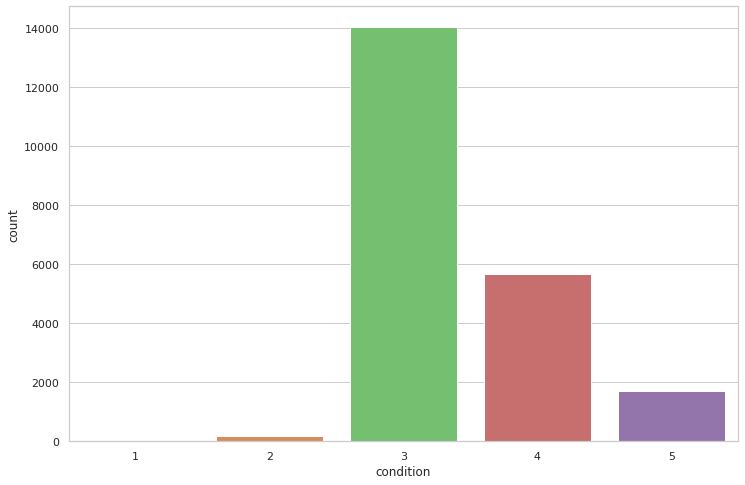

In [ ]:
#plotting the condition column
plt.figure(figsize=(12, 8))
sns.countplot(df.condition)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


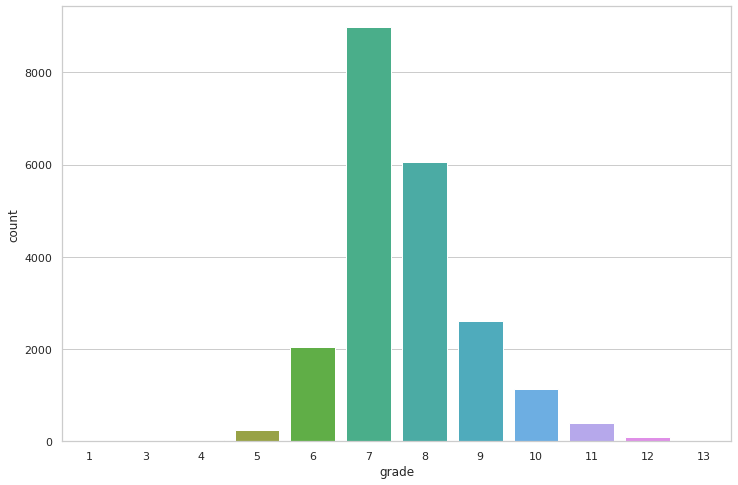

In [ ]:
#plotting the grade column
plt.figure(figsize=(12, 8))
sns.countplot(df.grade)

Grade 7 houses were more popular from the data collected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

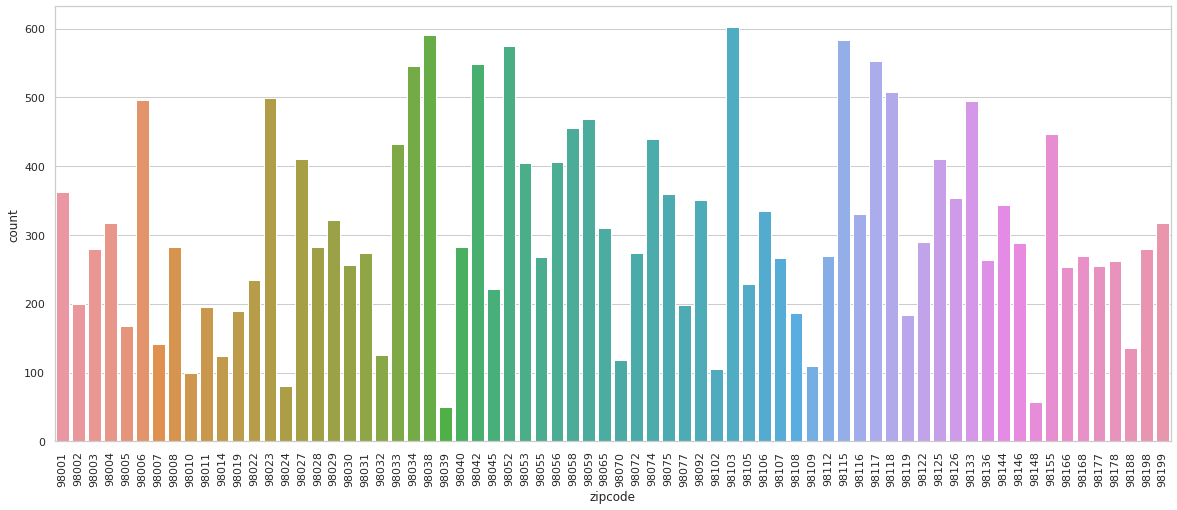

In [ ]:
#plotting the grade column
plt.figure(figsize=(20, 8))
sns.countplot(df.zipcode)
plt.xticks(rotation=90)

# **Numerical variables**

In [ ]:
pd.unique(df['floors'])

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

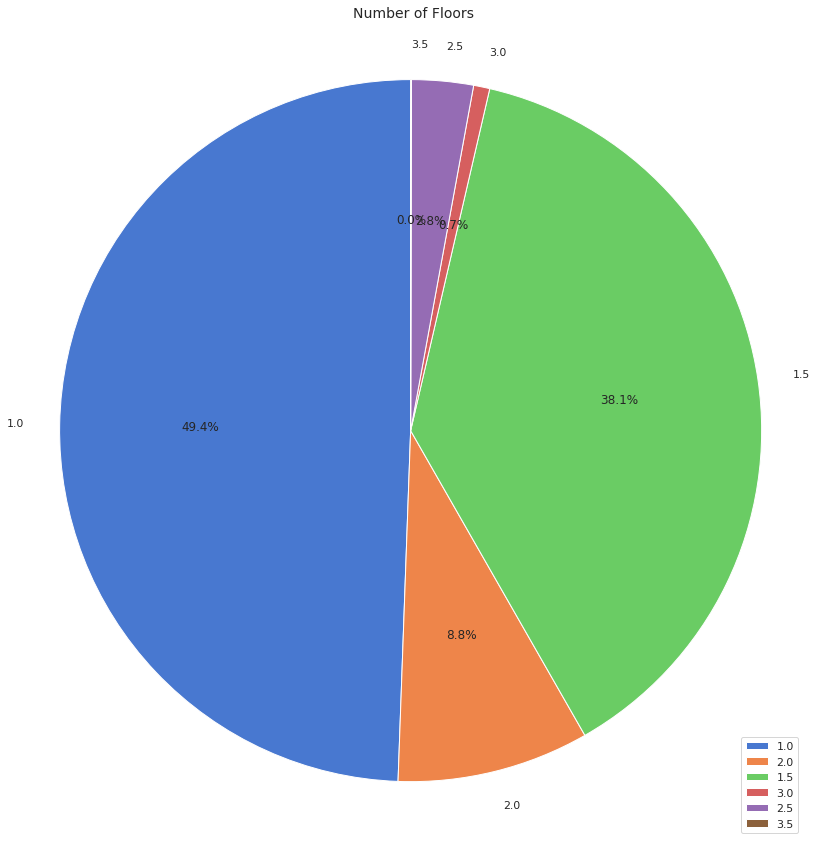

In [ ]:
tp = df['floors'].unique()
count = df.groupby(['floors'])["id"].count()

plt.figure(figsize=(14,15))
plt.pie(count, labels = tp, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.axis('equal')
plt.legend()
plt.title('Number of Floors', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

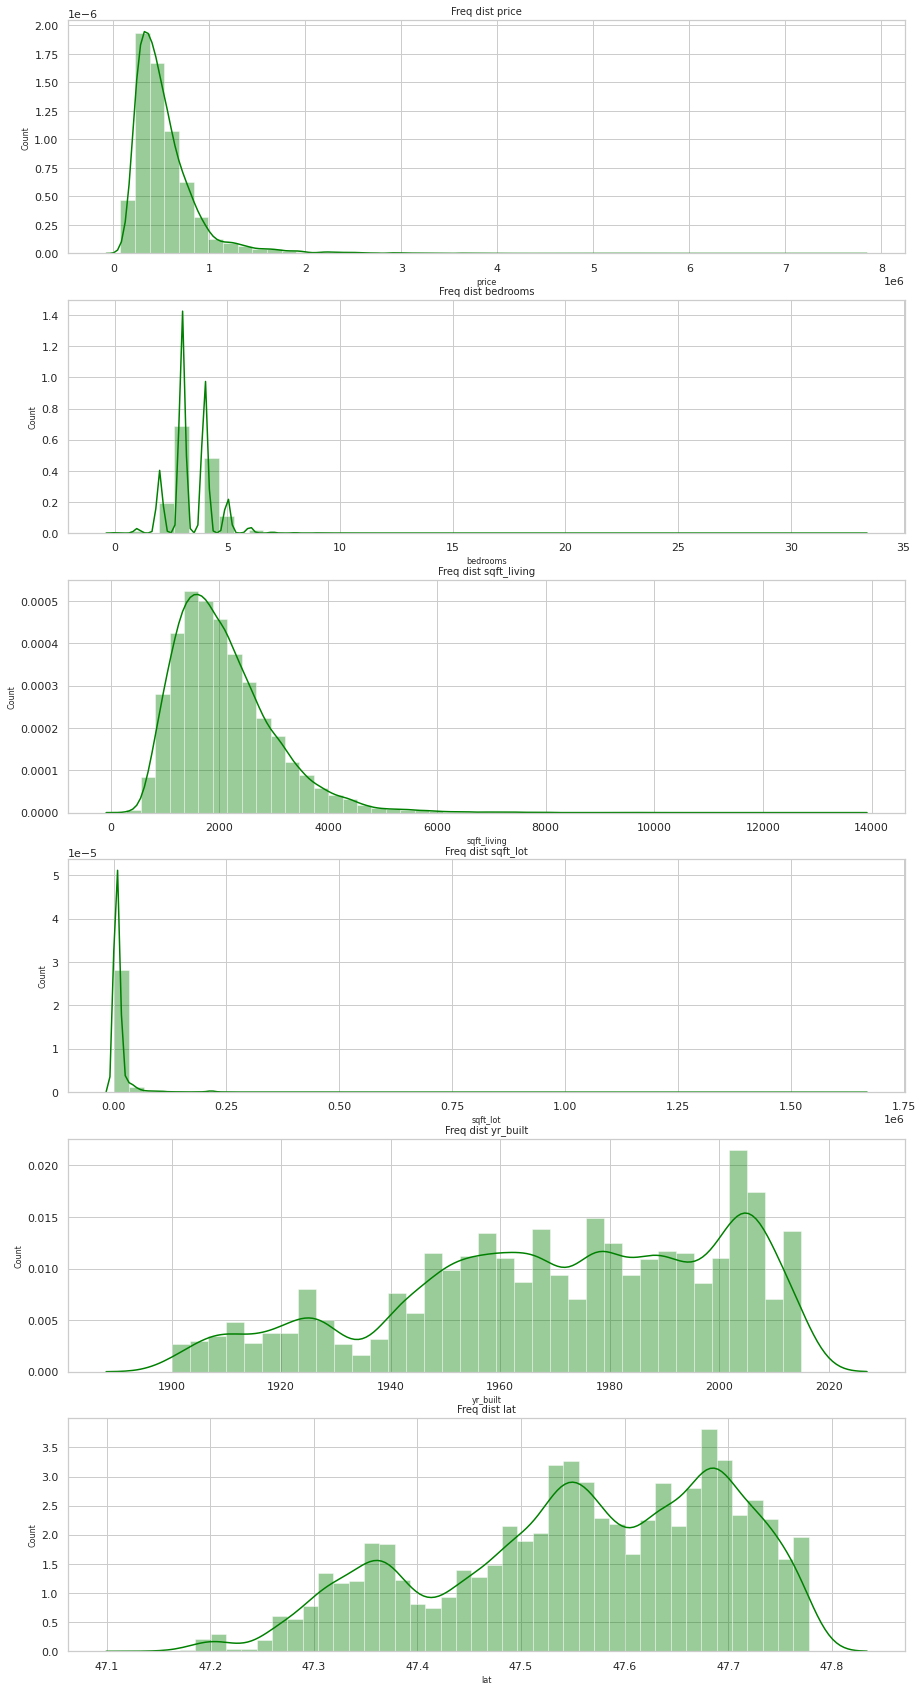

In [ ]:
#Analyzing numerical columns

col_names = ['price','bedrooms','sqft_living','sqft_lot','yr_built', 'lat']

fig, ax = plt.subplots(len(col_names), figsize=(15,30))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i],color= 'green')
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

# **Bivariate Analysis**

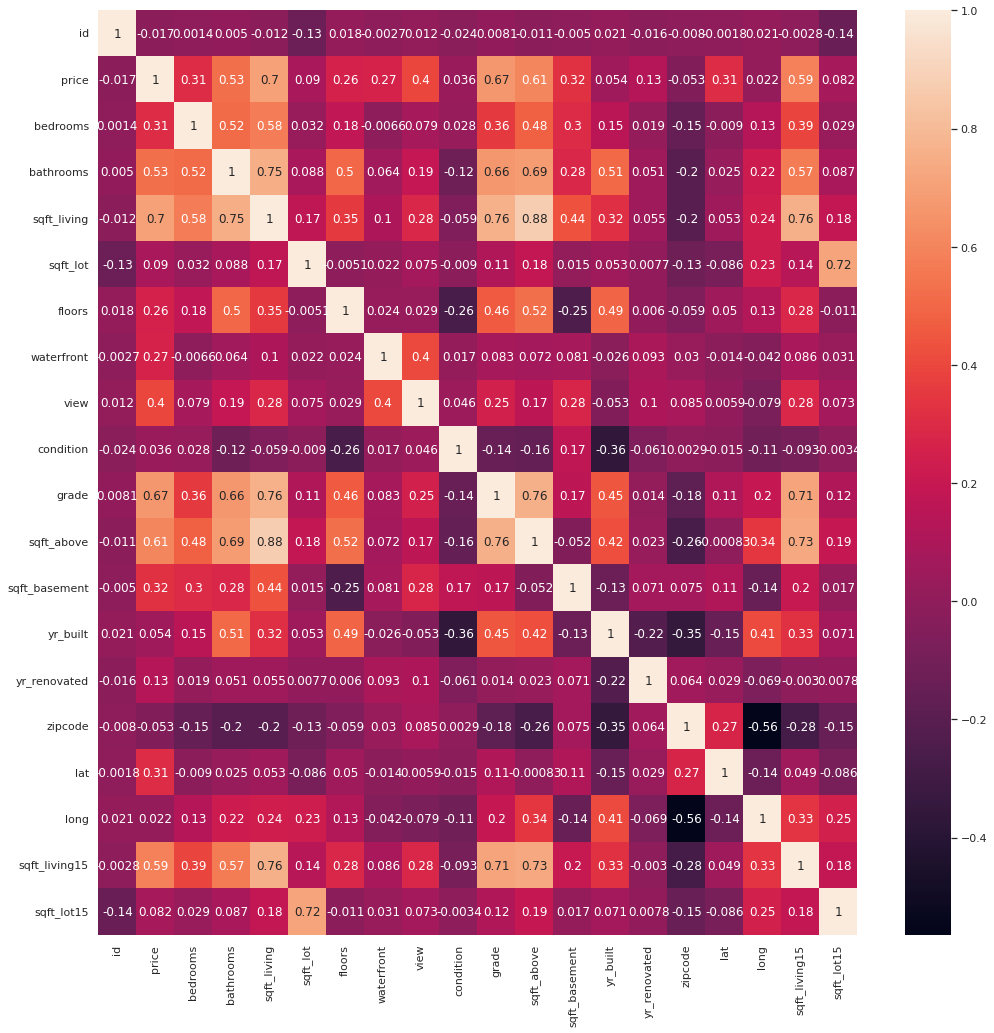

In [ ]:
#Checking varibale correlation

plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=True)
plt.show()

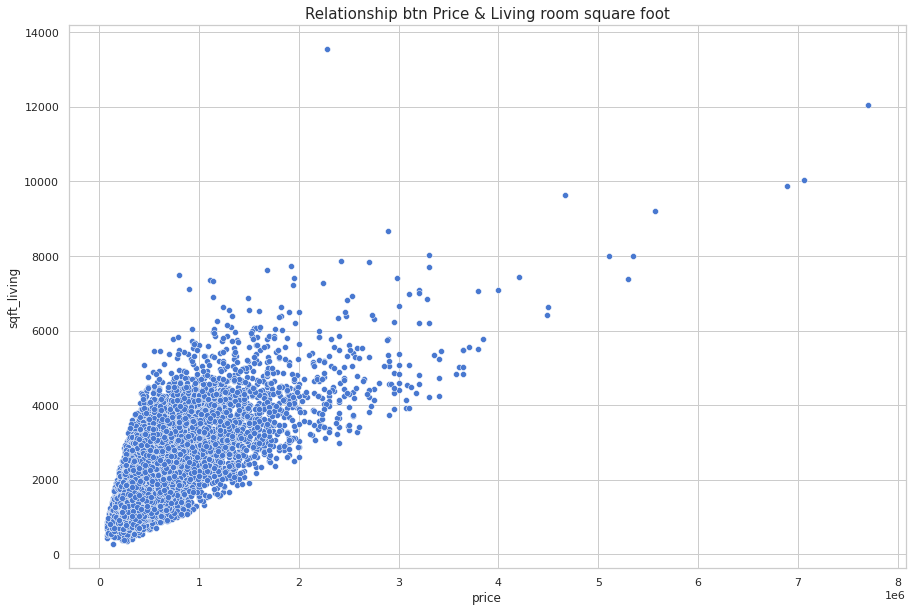

In [22]:
#Relationship btn Price & Living room square foot

plt.figure(figsize=(15, 10))
sns.scatterplot(x='price', y='sqft_living', data=df)
plt.title('Relationship btn Price & Living room square foot', fontsize=15)
plt.show()

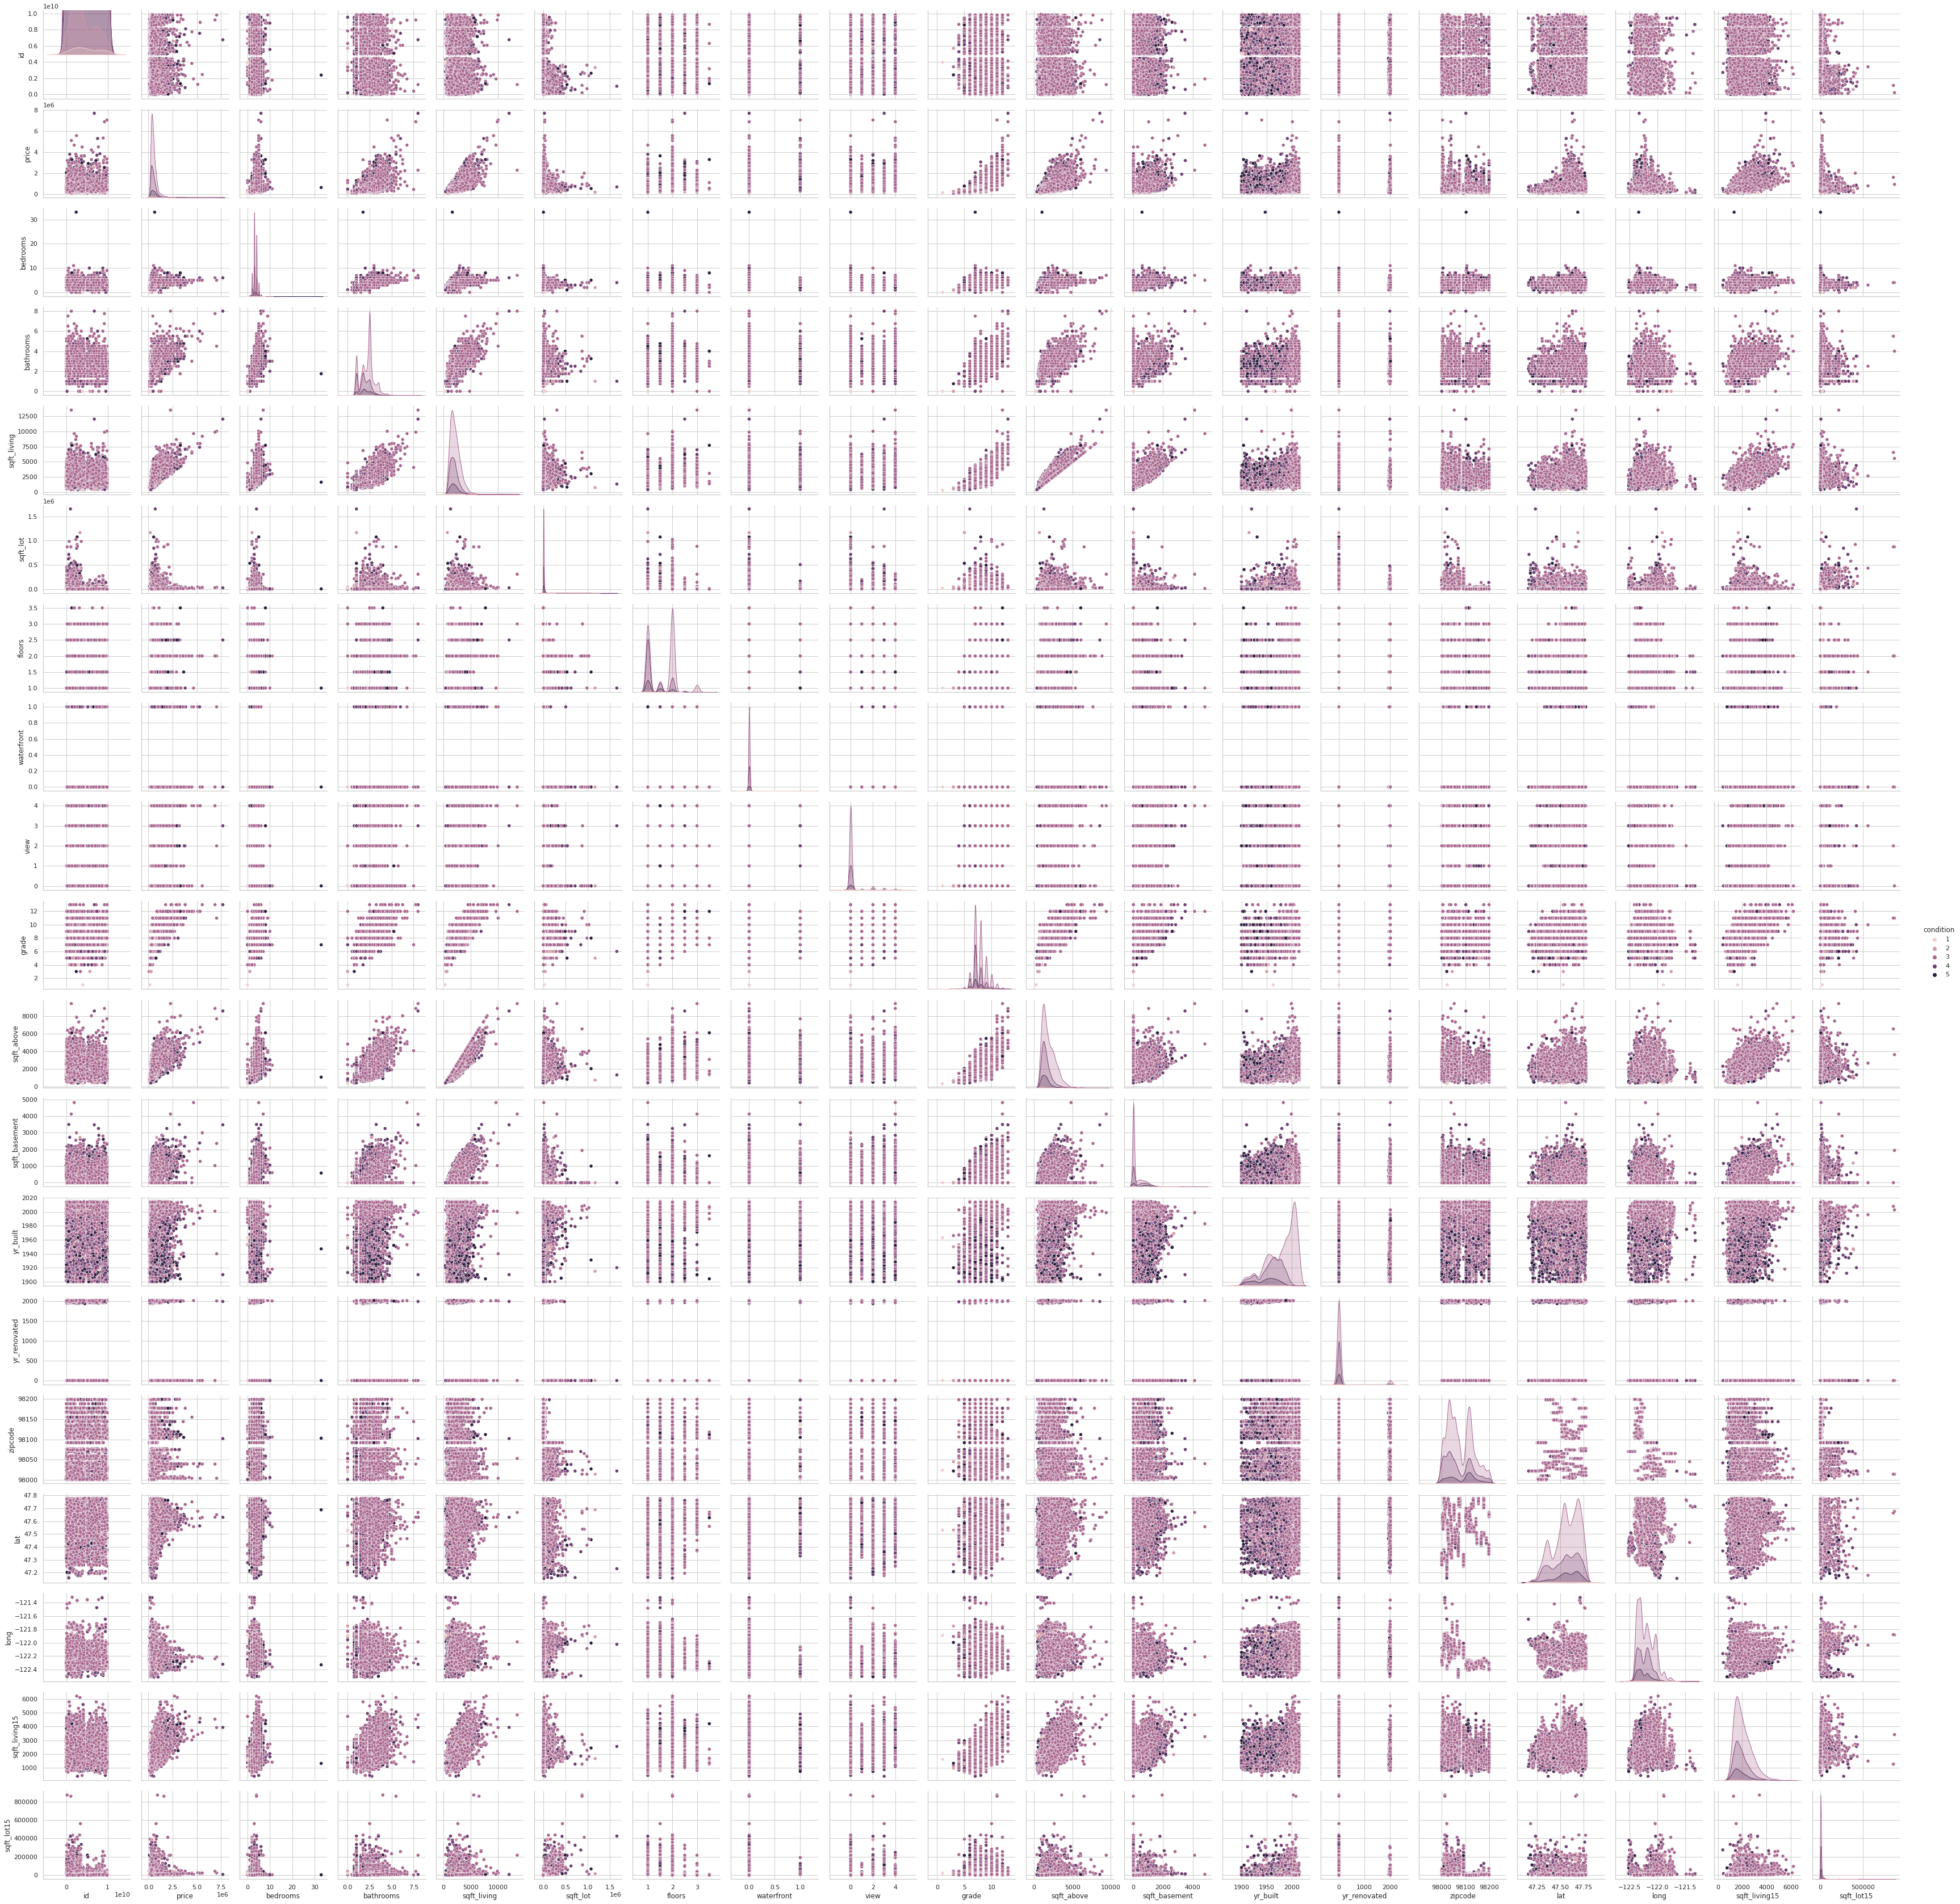

In [40]:
#Relationship btn Categorical & Numerical variables

sns.pairplot(df,hue='condition')
plt.show()

Text(0.5, 1.0, 'Stacked chart of Country and having a Bank Account')

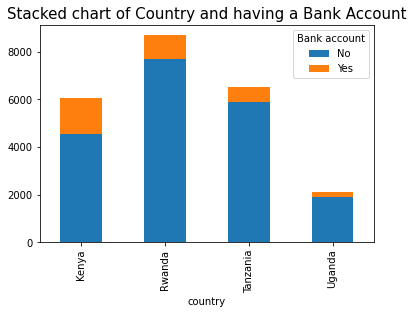

In [ ]:
#Those who have bank accounts based on country
pd.crosstab(df2['country'], df2['Bank account']).plot(kind='bar', stacked=True)
plt.title('Stacked chart of Country and having a Bank Account', fontsize=15)

#**Multivariate Analysis**

In [ ]:
##LABEL ENCODING

# Most of our variables are categorical and thus need to convert since 
# many ML algorithms work better with numerical inputs

#We thus use Label-encoder and One-Hot-Encoding to change our categorical values to numeric


categorical_cols = ['country', 'Bank account', 'Location type','Cell Phone Access',
                    'Gender', 'The relathip with head', 'marital_status', 'Level of Educuation','Job type'] 

from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df2[categorical_cols] = df2[categorical_cols].apply(lambda col: le.fit_transform(col))
df2.head()



country  year    uniqueid  ...  marital_status  Level of Educuation  Job type
0        0  2018  uniqueid_1  ...               2                    4         9
1        0  2018  uniqueid_2  ...               4                    1         4
2        0  2018  uniqueid_3  ...               3                    6         9
3        0  2018  uniqueid_4  ...               2                    3         3
4        0  2018  uniqueid_5  ...               3                    3         5

[5 rows x 13 columns]

In [ ]:
## ONE-HOT-ENCODING

#Though label encoding is straight but it has the disadvantage that the numeric values 
#can be misinterpreted by algorithms as having some sort of hierarchy/order in them. 
#This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. 
#In this strategy, each category value is converted into a new column 
#and assigned a 1 or 0 (notation for true/false) value to the column

#To achieve one hot encoding from our raw data, we use below

df_new = pd.get_dummies(df2, columns = categorical_cols)
df_new.head()

year    uniqueid  household_size  ...  Job type_7  Job type_8  Job type_9
0  2018  uniqueid_1             3.0  ...           0           0           1
1  2018  uniqueid_2             5.0  ...           0           0           0
2  2018  uniqueid_3             5.0  ...           0           0           1
3  2018  uniqueid_4             5.0  ...           0           0           0
4  2018  uniqueid_5             8.0  ...           0           0           0

[5 rows x 44 columns]

In [ ]:
#Below is a Sklearn code for achieving one hot encoding

# #Importing onehotencoder library

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# # #One-hot-encode the categorical columns.
# # #Unfortunately outputs an array instead of dataframe.

# array_hot_encoded = ohe.fit_transform(df2[categorical_cols])

# # #Convert it to df

# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df2.index)
# data_hot_encoded.head()

# #Extract only the columns that didnt need to be encoded

# data_other_cols = df2.drop(columns=categorical_cols)

# # #Concatenate the two dataframes : 

# df_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

# df_out.head()

#Principal Component Analysis

In [ ]:
#Preprocessing

X = df_new.drop('year', 1)
y = df_new['year']

In [ ]:
#Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# **INSIGHTS FOR IMPROVEMENT**

1. For future studies, data with more variables can be used to be able to measure underlying issues like satisfaction and other factors that may influence banking penetration. This will also enable comparing the results with other ML methodologies used like Factor analysis.